In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy import stats
import collections

rng = np.random.default_rng()

ConfidenceInterval = collections.namedtuple('ConfidenceInterval', ['low', 'high'])


def mean_interval(data: np.ndarray, significance_level=0.1, confidence_level: float | None = None) -> ConfidenceInterval:
    if confidence_level is not None:
        significance_level = 1 - confidence_level

    _mean = data.mean()
    _std = data.std()
    _n = data.shape[0]
    _t = stats.t.ppf(df=_n-1, q=1-significance_level/2)
    diff = _t * _std / np.sqrt(_n)
    return ConfidenceInterval( low=_mean - diff, high=_mean + diff )


def var_interval(data: np.ndarray, significance_level=0.1, confidence_level: float | None = None) -> ConfidenceInterval:
    if confidence_level is not None:
        significance_level = 1 - confidence_level

    _std = data.std()
    _n = data.shape[0]
    return ConfidenceInterval(
        low=(_n-1) * _std**2 / stats.chi2.ppf(df=_n-1, q=1-significance_level/2),
        high=(_n-1) * _std**2 / stats.chi2.ppf(df=_n-1, q=significance_level/2)
    )

# 1. Gens

- Загрузить
- Проверить корректоность
- Исправить опечатки

In [2]:
gens = pd.read_csv("gens.csv", decimal=',', delimiter=';')
gens

,Nn,C-4G,C-4,C-6G,C-6
0,c1,ТТ,1.4,CC,1.1
1,c2,СТ,1.6,CT,0.6
2,c3,СТ,1.4,CC,1.1
3,c4,СТ,1.5,CC,0.7
4,c5,СТ,1.5,CC,0.9
...,...,...,...,...,...
205,vr31,СТ,6.7,ТТ,1.1
206,vr32,СТ,6.7,ТТ,2.3
207,vr33,СТ,5.4,CT,1.2
208,vr34,СТ,7.8,ТТ,1.2


In [3]:
gens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nn      210 non-null    object 
 1   C-4G    210 non-null    object 
 2   C-4     210 non-null    float64
 3   C-6G    210 non-null    object 
 4   C-6     210 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.3+ KB


In [4]:
def unique_info(name: str):
    return gens[name].unique(), list(
        map(lambda x: (tuple(map(ord, x)), x, (gens[name] == x).sum()), gens[name].unique()))

In [5]:
unique_info("C-4G")

(array(['ТТ', 'СТ', 'СС', 'TT'], dtype=object),
 [((1058, 1058), 'ТТ', np.int64(3)),
  ((1057, 1058), 'СТ', np.int64(113)),
  ((1057, 1057), 'СС', np.int64(62)),
  ((84, 84), 'TT', np.int64(32))])

In [6]:
gens.loc[gens["C-4G"] == "ТТ", "C-4G"] = "TT"
gens.loc[gens["C-4G"] == "СТ", "C-4G"] = "CT"
gens.loc[gens["C-4G"] == "СС", "C-4G"] = "CC"

In [7]:
unique_info("C-4G")

(array(['TT', 'CT', 'CC'], dtype=object),
 [((84, 84), 'TT', np.int64(35)),
  ((67, 84), 'CT', np.int64(113)),
  ((67, 67), 'CC', np.int64(62))])

In [8]:
unique_info("C-6G")

(array(['CC', 'CT', 'ТТ', 'СС', 'СТ'], dtype=object),
 [((67, 67), 'CC', np.int64(61)),
  ((67, 84), 'CT', np.int64(105)),
  ((1058, 1058), 'ТТ', np.int64(41)),
  ((1057, 1057), 'СС', np.int64(2)),
  ((1057, 1058), 'СТ', np.int64(1))])

In [9]:
gens.loc[gens["C-6G"] == "ТТ", "C-6G"] = "TT"
gens.loc[gens["C-6G"] == "СТ", "C-6G"] = "CT"
gens.loc[gens["C-6G"] == "СС", "C-6G"] = "CC"

In [10]:
unique_info("C-6G")

(array(['CC', 'CT', 'TT'], dtype=object),
 [((67, 67), 'CC', np.int64(63)),
  ((67, 84), 'CT', np.int64(106)),
  ((84, 84), 'TT', np.int64(41))])

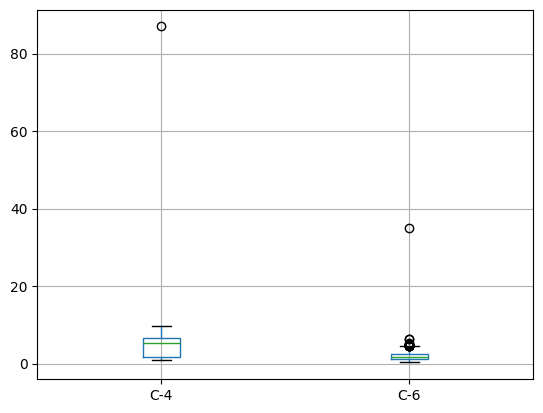

In [11]:
gens[["C-4", "C-6"]].boxplot()
plt.show()

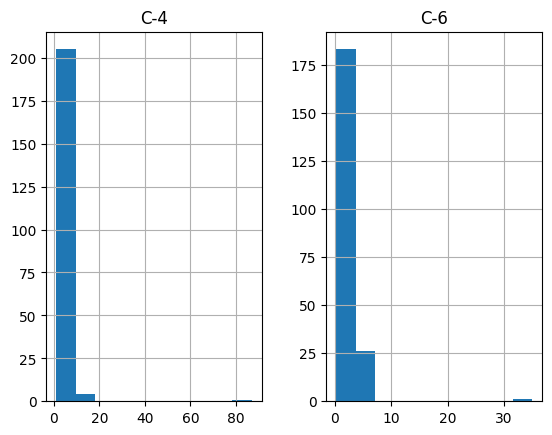

In [12]:
gens[["C-4", "C-6"]].hist()
plt.show()

In [13]:
gens[["C-4", "C-6"]].quantile([0, 0.25, 0.5, 0.75, 1])

,C-4,C-6
0.00,0.9,0.300
0.25,1.6,1.100
0.50,5.4,1.600
0.75,6.7,2.475
1.00,87.0,35.000


In [14]:
gens.loc[gens["C-4"] > 10, "C-4"] /= 10
gens.loc[gens["C-6"] > 10, "C-6"] /= 10

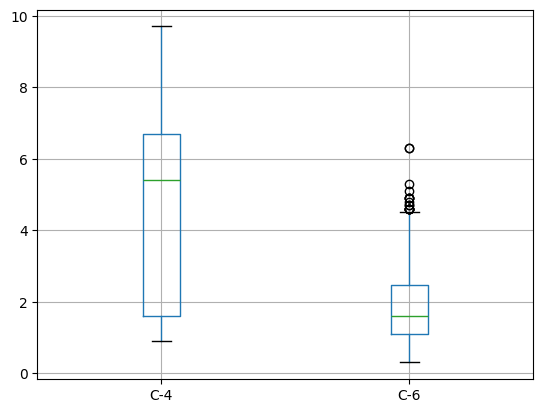

In [15]:
gens[["C-4", "C-6"]].boxplot()
plt.show()

- Отрисовать данные "Генотип - уровень цитокина"

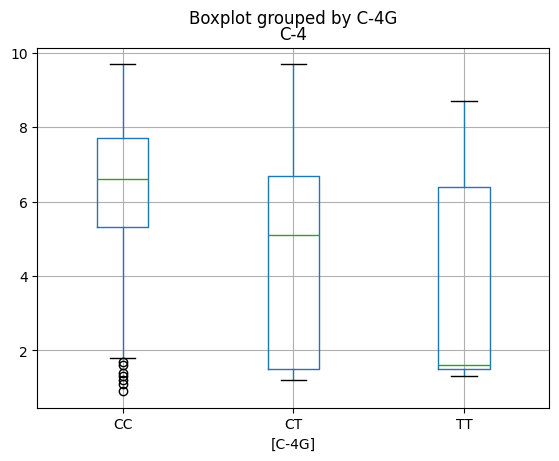

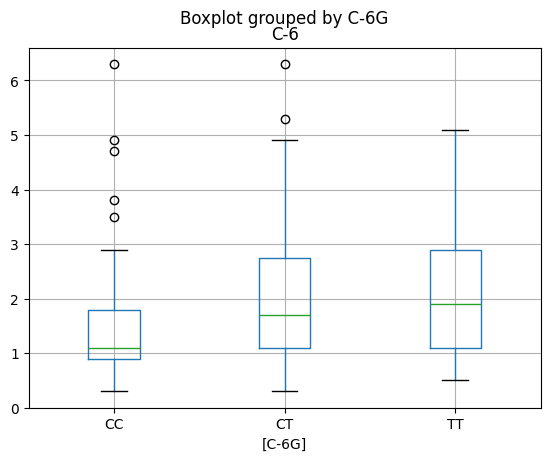

In [64]:
gens[["C-4", "C-4G"]].boxplot(by="C-4G")
gens[["C-6", "C-6G"]].boxplot(by="C-6G")
plt.show()

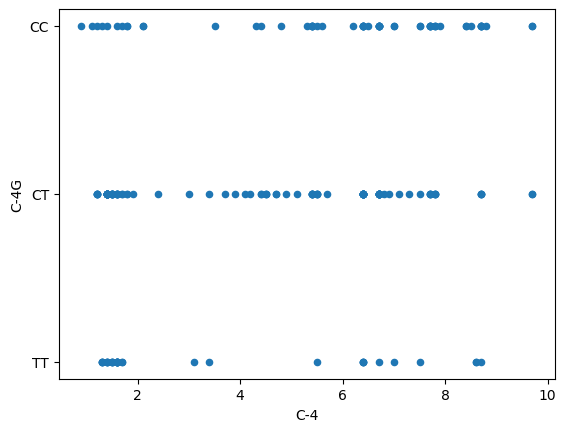

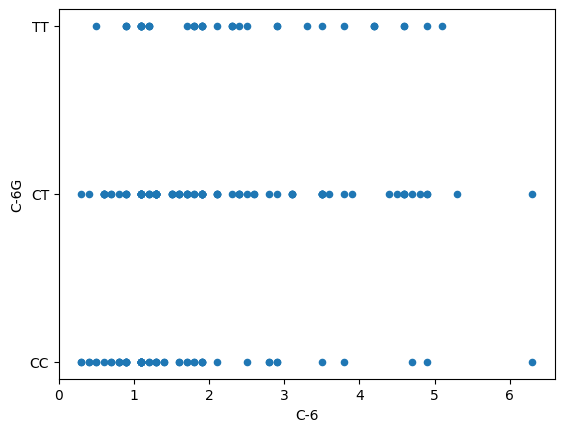

In [49]:
gens.plot.scatter(x="C-4", y="C-4G")
gens.plot.scatter(x="C-6", y="C-6G")
plt.show()

- Найти основные характеристики распределения

In [17]:
gens[["C-4", "C-6"]].quantile([0, 0.25, 0.5, 0.75, 1])

,C-4,C-6
0.00,0.9,0.300
0.25,1.6,1.100
0.50,5.4,1.600
0.75,6.7,2.475
1.00,9.7,6.300


In [18]:
gens[["C-4", "C-6"]].quantile(.75) - gens[["C-4", "C-6"]].quantile(.25)
# IQR

C-4    5.100
C-6    1.375
dtype: float64

In [19]:
gens[["C-4", "C-6"]].mean()

C-4    4.749524
C-6    1.961429
dtype: float64

In [20]:
gens[["C-4", "C-6"]].mode()

,C-4,C-6
0,6.4,1.1


In [21]:
gens[["C-4", "C-6"]].std()

C-4    2.702847
C-6    1.277478
dtype: float64

In [22]:
gens[["C-4", "C-6"]].var()

C-4    7.305383
C-6    1.631950
dtype: float64

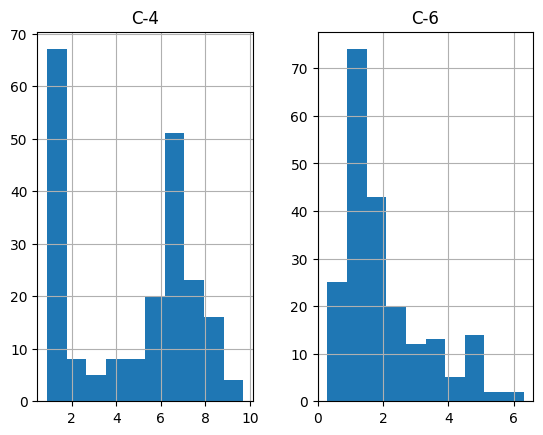

In [23]:
gens[["C-4", "C-6"]].hist()
plt.show()

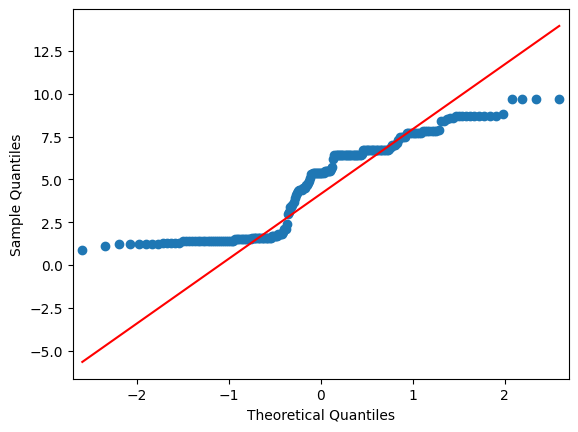

In [24]:
sm.qqplot(gens["C-4"], line='q')
plt.show()

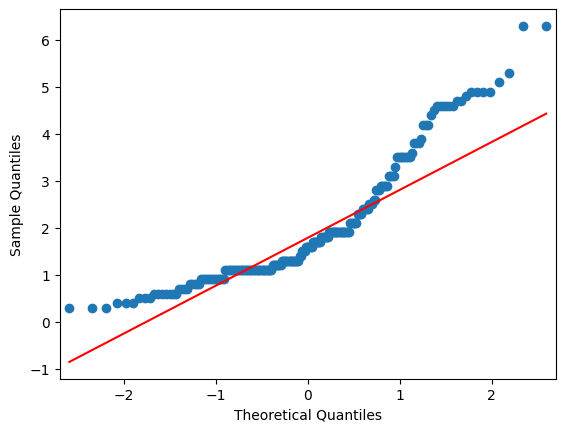

In [25]:
sm.qqplot(gens["C-6"], line='q')
plt.show()

In [26]:
stats.shapiro(gens["C-4"]), stats.shapiro(gens["C-6"])

(ShapiroResult(statistic=np.float64(0.8774099837839551), pvalue=np.float64(5.177373893701402e-12)),
 ShapiroResult(statistic=np.float64(0.8671888846884092), pvalue=np.float64(1.4122109856054737e-12)))

# 2. Sudents

- Ник, вес, рост, размер одежды, пол

In [27]:
stud = pd.read_csv("students.csv", delimiter=';').drop(columns=["N"])
stud.head()

,Nickname,Weight,Height,Clothes,Gender
0,AlphaWolf,72,178,L,М
1,ThunderStorm,85,185,XL,М
2,Phantom,68,175,M,М
3,Titan,90,182,XXL,М
4,Shadow,74,180,L,М


In [28]:
stud["Clothes"].unique()

array(['L', 'XL', 'M', 'XXL', 'S', 'XS'], dtype=object)

In [29]:
mark_map = {
    'XS': "^",
    'S': "v",
    'M': "*",
    'L': "s",
    'XL': "p",
    'XXL': "+",
}

- Отрисовать значения "рост - вес": форма - размер одежды, цвет - пол.

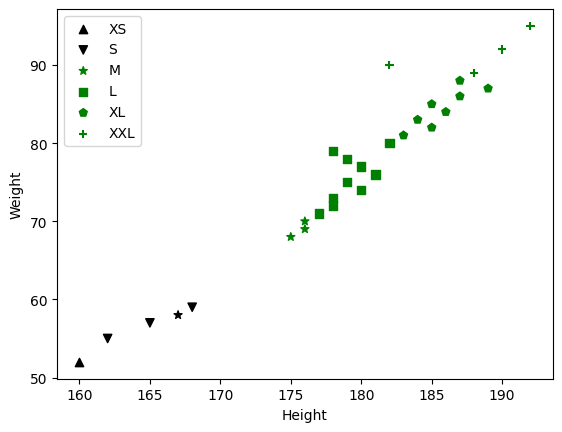

In [65]:
# col = np.where(stud["Gender"] == "М", "green", "yellow")
# for (i, x), c in zip(stud.iterrows(), col):
#     plt.scatter(x["Height"], x["Weight"], c=c, marker=mark_map[x["Clothes"]])
# plt.legend(mark_map.keys(), loc='upper left')

for size, marker in mark_map.items():
    x = stud.loc[stud.Clothes == size]
    col = np.where(x["Gender"] == "М", "green", "black")
    plt.scatter(x["Height"], x["Weight"], c=col, marker=marker)
plt.legend(mark_map.keys())
plt.xlabel("Height")
plt.ylabel("Weight")

plt.show()

- Проверить на нормальность рос и вес

In [31]:
stats.shapiro(stud["Height"]), stats.shapiro(stud["Weight"])

(ShapiroResult(statistic=np.float64(0.9329366041918788), pvalue=np.float64(0.058791656990040055)),
 ShapiroResult(statistic=np.float64(0.9556770876977321), pvalue=np.float64(0.2392608536499526)))

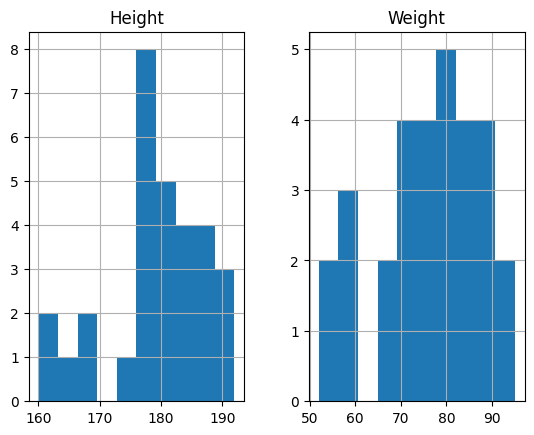

In [32]:
stud[["Height", "Weight"]].hist()
plt.show()

# 3. Bootstrap

- Найти параметрические и бутстрепные довреительные интервалы (95% и 99%)

In [33]:
salary = np.array([21, 19, 27, 11, 102, 25, 21])

In [34]:
mean = salary.mean()
std = salary.std()
mean, std

(np.float64(32.285714285714285), np.float64(28.847947615604358))

In [35]:
mean_interval(salary, confidence_level=0.95), mean_interval(salary, confidence_level=0.99)

(ConfidenceInterval(low=np.float64(5.605812585721029), high=np.float64(58.965615985707544)),
 ConfidenceInterval(low=np.float64(-8.13822461607527), high=np.float64(72.70965318750385)))

In [229]:
mean95 = stats.bootstrap((salary,), np.mean, confidence_level=0.95, rng=rng)
mean99 = stats.bootstrap((salary,), np.mean, confidence_level=0.99, rng=rng)
mean95.confidence_interval, mean99.confidence_interval

(ConfidenceInterval(low=np.float64(19.285714285714285), high=np.float64(68.47750620529041)),
 ConfidenceInterval(low=np.float64(18.142857142857142), high=np.float64(87.24551170285018)))

In [37]:
var_interval(salary, confidence_level=0.95), var_interval(salary, confidence_level=0.99)

(ConfidenceInterval(low=np.float64(345.5668064450021), high=np.float64(4035.4367887354338)),
 ConfidenceInterval(low=np.float64(269.21158258340637), high=np.float64(7389.413378878555)))

In [38]:
var95 = stats.bootstrap((salary,), np.var, confidence_level=0.95, rng=rng)
var99 = stats.bootstrap((salary,), np.var, confidence_level=0.99, rng=rng)
var95.confidence_interval, var99.confidence_interval

(ConfidenceInterval(low=np.float64(10.77551020408163), high=np.float64(1844.244897959184)),
 ConfidenceInterval(low=np.float64(6.857142857142857), high=np.float64(1928.816326530612)))

# 4. Jackknife

In [225]:
def jackkinfe(_data: np.ndarray) -> np.ndarray:
    return np.array([np.delete(_data, i) for i in range(len(_data))])

def jackknife_variance(data: np.ndarray):
    n = len(data)
    jk_replicates = np.empty(n)

    for i in range(n):
        jk_sample = np.delete(data, i)
        jk_replicates[i] = np.var(jk_sample, ddof=1)

    jk_mean = np.mean(jk_replicates)

    variance =( ((n - 1) / n) * np.sum((jk_replicates - jk_mean)**2))**0.5
    return variance, jk_replicates


In [226]:
salary, jackkinfe(salary)

(array([ 21,  19,  27,  11, 102,  25,  21]),
 array([[ 19,  27,  11, 102,  25,  21],
        [ 21,  27,  11, 102,  25,  21],
        [ 21,  19,  11, 102,  25,  21],
        [ 21,  19,  27, 102,  25,  21],
        [ 21,  19,  27,  11,  25,  21],
        [ 21,  19,  27,  11, 102,  21],
        [ 21,  19,  27,  11, 102,  25]]))

In [227]:
salary.mean(), jackkinfe(salary).mean(-1), jackkinfe(salary).mean(1).mean(), jackkinfe(salary).mean()

(np.float64(32.285714285714285),
 array([34.16666667, 34.5       , 33.16666667, 35.83333333, 20.66666667,
        33.5       , 34.16666667]),
 np.float64(32.285714285714285),
 np.float64(32.285714285714285))

In [228]:
salary.var(ddof=1), jackkinfe(salary).var(-1), jackknife_variance(salary)[0]

(np.float64(970.904761904762),
 array([946.13888889, 936.58333333, 965.47222222, 882.80555556,
         25.88888889, 960.58333333, 946.13888889]),
 np.float64(942.7424881225862))

In [79]:
salary.std()

np.float64(28.847947615604358)

##### 5. -> см. 2

# 6. Students conf. interval

In [43]:
stud_count = stud.shape[0]

height_mean = stud["Height"].mean()
height_std = stud["Height"].std()
height_std0 = stud["Height"].std(ddof=1)

weight_mean = stud["Weight"].mean()
weight_std = stud["Weight"].std()
weight_std0 = stud["Weight"].std(ddof=1)
(height_mean, height_std, stud["Height"].var()), (weight_mean, weight_std, stud["Weight"].var())

((np.float64(179.3), np.float64(8.167006795638168), np.float64(66.7)),
 (np.float64(76.16666666666667),
  np.float64(11.486373736266613),
  np.float64(131.9367816091954)))

In [44]:
mean_interval(stud["Height"], confidence_level=.95), mean_interval(stud["Height"], confidence_level=.99)

(ConfidenceInterval(low=np.float64(176.2503895435636), high=np.float64(182.3496104564364)),
 ConfidenceInterval(low=np.float64(175.18999538211196), high=np.float64(183.41000461788806)))

In [45]:
mean_interval(stud["Weight"], confidence_level=.95), mean_interval(stud["Weight"], confidence_level=.99)

(ConfidenceInterval(low=np.float64(71.87758422444766), high=np.float64(80.45574910888568)),
 ConfidenceInterval(low=np.float64(70.38620752414982), high=np.float64(81.94712580918352)))

In [46]:
var_interval(stud["Height"], confidence_level=.95), var_interval(stud["Height"], confidence_level=.99)

(ConfidenceInterval(low=np.float64(42.30540897024434), high=np.float64(120.53912618578943)),
 ConfidenceInterval(low=np.float64(36.95953314073398), high=np.float64(147.4184933435866)))

In [47]:
var_interval(stud["Weight"], confidence_level=.95), var_interval(stud["Weight"], confidence_level=.99)

(ConfidenceInterval(low=np.float64(83.68275118732869), high=np.float64(238.43394852980128)),
 ConfidenceInterval(low=np.float64(73.10827364867825), high=np.float64(291.6030219104859)))